<div style="line-height: 0.4;">
    <h1 style="color: green; font-weight: bold; text-align: center;"></h1>
    <h1 style="color: green; font-weight: bold; text-align: center;">PRELIMINARES</h1>
    <h3 style="color: darkolivegreen; font-weight: bold; text-align: center;">CURSO 4 (PROCESOS ESTOCÁSTICOS 2)</h3>
    <h5 style="color: darkolivegreen; font-weight: bold; text-align: center;">PARTE 2 / LECCIÓN 1</h5>
</div>

<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 1</h4>

<h3>Simulación de un proceso de renovación</h3> 

Simulamos un proceso de renovación donde los tiempos de vida de los componentes siguen una distribución exponencial. El proceso de renovación cuenta el número de renovaciones que ocurren hasta un tiempo $t$.

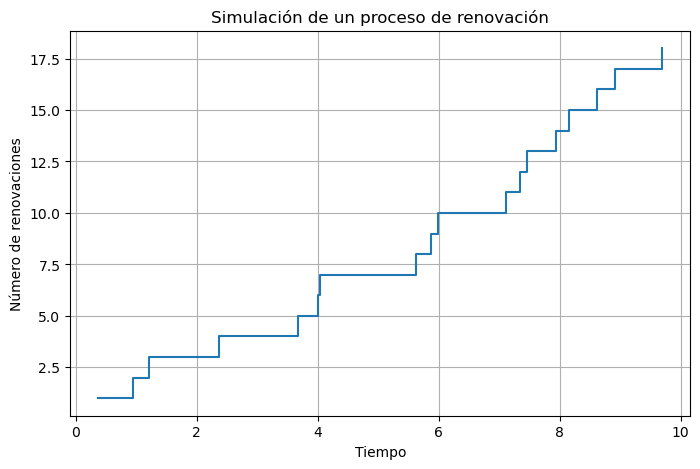

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
lambda_rate = 1  # Tasa de la distribución exponencial
t_max = 10  # Tiempo máximo

# Función para simular el proceso de renovación
def renovar(lambda_rate, t_max):
    tiempos_de_vida = []
    t = 0
    while t < t_max:
        tiempo_vida = np.random.exponential(1 / lambda_rate)
        t += tiempo_vida
        if t <= t_max:
            tiempos_de_vida.append(t)
    return tiempos_de_vida

# Simulación del proceso
tiempos = renovar(lambda_rate, t_max)

# Mostrar los tiempos de renovación
plt.figure(figsize=(8, 5))
plt.step(tiempos, range(1, len(tiempos) + 1), where='post', label='Renovaciones')
plt.xlabel('Tiempo')
plt.ylabel('Número de renovaciones')
plt.title('Simulación de un proceso de renovación')
plt.grid(True)
plt.show()

<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 2</h4>

<h3>Cálculo de la función de distribución de Wn para un proceso Poisson</h3> 

En este ejemplo, calculamos la distribución de $W_{n}$ para un proceso de Poisson homogéneo de tasa λ, que sigue una distribución gamma.

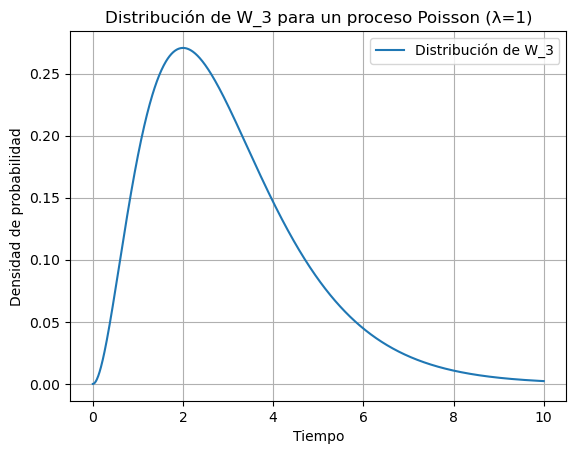

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parámetros
lambda_rate = 1  # Tasa del proceso de Poisson
n = 3  # Número de renovaciones
t_max = 10  # Tiempo máximo

# Función de distribución gama para W_n
def distribucion_gamma(n, lambda_rate, t_max):
    x = np.linspace(0, t_max, 1000)
    pdf = gamma.pdf(x, a=n, scale=1/lambda_rate)
    return x, pdf

# Obtener y graficar la distribución
x, pdf = distribucion_gamma(n, lambda_rate, t_max)

plt.plot(x, pdf, label=f'Distribución de W_{n}')
plt.xlabel('Tiempo')
plt.ylabel('Densidad de probabilidad')
plt.title(f'Distribución de W_{n} para un proceso Poisson (λ={lambda_rate})')
plt.grid(True)
plt.legend()
plt.show()

<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 3</h4>

<h3>Simulación de la distribución de renovaciones y cálculo de P(Nt = t)</h3> 

Simulamos el proceso de renovación y luego calculamos $P(N_{t} = t)$, la probabilidad de que haya n renovaciones antes del tiempo t. 

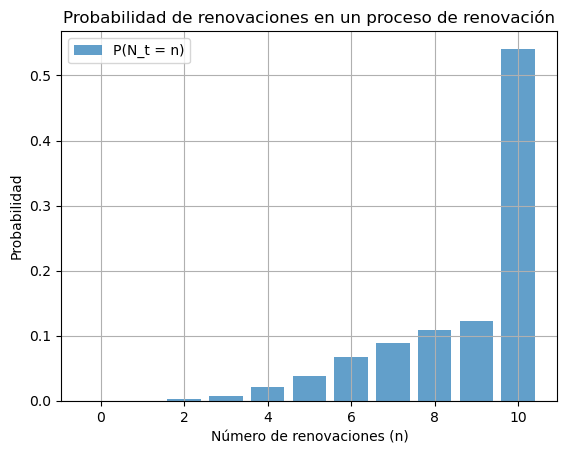

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parámetros
lambda_rate = 1  # Tasa de la distribución exponencial
t_max = 10  # Tiempo máximo
n_max = 10  # Máximo número de renovaciones

# Simulación de un proceso de renovación para obtener N(t)
def simular_proceso(lambda_rate, t_max, n_max):
    renovaciones = []
    t = 0
    while t < t_max and len(renovaciones) < n_max:
        tiempo_vida = np.random.exponential(1 / lambda_rate)
        t += tiempo_vida
        if t <= t_max:
            renovaciones.append(t)
    return len(renovaciones)

# Simulación para calcular P(N_t = n)
simulaciones = [simular_proceso(lambda_rate, t_max, n_max) for _ in range(10000)]
probs = [simulaciones.count(n) / len(simulaciones) for n in range(n_max + 1)]

# Graficar las probabilidades de P(N_t = n)
plt.bar(range(n_max + 1), probs, alpha=0.7, label="P(N_t = n)")
plt.xlabel('Número de renovaciones (n)')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de renovaciones en un proceso de renovación')
plt.grid(True)
plt.legend()
plt.show()